<a href="https://colab.research.google.com/github/ikarosgn/DMDP/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt  
from collections import OrderedDict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



1. ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น
2. โครงการบ้านที่ขอนแก่นมีทั้งหมดกี่โครงการ
3. โครงการที่ขอนแก่นกับอุดรอันไหนแพงกว่ากัน
4. เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่นกับ กทม. 
5. เปรีบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่น และจังหวัดโคราช
7. ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช **เทียบกับ** เชียงใหม่ เชียงราย 
8. ให้สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด
9. บ้านในภาคเหนือ ใต้ อีสาน ที่ไหนแพงสุด ถูกสุด (เลือกจังหวัดที่เป็นตัวแทน ภาคละ 2 จังหวัด)
10. ความหลากหลายของโครงการในขอนแก่น เทียบกับ ชลบุรี


In [ ]:
project_df = pd.read_csv('/content/drive/MyDrive/DPDM65/opendata_project.csv')
print(project_df.shape)  ##บอกขนาดของ DataFrame
project_df.head()

(23434, 45)


,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...
3,20719.0,project_2010,Baan Sansabai 1,บ้านแสนสบาย 1,1,Detached House,บ้าน,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2016-09-05 15:32:15,1970-01-02 07:00:00,2020-12-04 10:45:31,baania,https://baania.com/th/project/บ้านแสนสบาย-1-pr...
4,199.0,project_16838,Baanpruksa Ratchapruek-345,บ้านพฤกษา ราชพฤกษ์-345,3,Townhome,ทาวน์โฮม,1930000.0,developer_1026,"Preuksa Real Estate Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2019-09-05 11:49:37,1970-01-02 07:00:00,2021-03-17 12:00:04,baania,https://baania.com/th/project/บ้านพฤกษา-ราชพฤก...


- วน Loop เพื่อ Check ค่าใน Columns ชื่อ `'price_min' ที่ไม่ใช่ตัวเลข 

In [ ]:
xx=list()
x_index = list()
for k in range(len(project_df)):
    if type(project_df['price_min'][k]) != float:
        p1 = project_df['price_min'][k]
        x = re.findall("[ก-๙]", p1)
        if len(x) > 0:
            xx.append(k)
            x_index.append(p1)
            print(p1, k)

สามโคก 5839
สามโคก 8866
เมืองปทุมธานี 14130
ลาดหลุมแก้ว 21895
สามโคก 23353


In [ ]:
print(len(xx))
xx

5


[5839, 8866, 14130, 21895, 23353]

In [ ]:
list(set(x_index))

['ลาดหลุมแก้ว', 'เมืองปทุมธานี', 'สามโคก']

In [ ]:
project_df_ = project_df.drop(project_df.index[xx])
project_df_ = project_df_.reset_index(drop=True)
print(project_df_.shape)
project_df_.head(3)

(23429, 45)


,row_number,project_id,name_en,name_th,propertytype_id,propertytype_name_en,propertytype_name_th,price_min,developer_id,developer_name_en,...,facility_meeting,facility_park,facility_playground,facility_pool,facility_security,date_created,date_finish,date_updated,source,url_project
0,7880.0,5ee08d64dda791001299b2a6,Winning Residence Sukhumvit Praksa,วินนิ่ง เรสซิเดนท์ สุขุมวิท แพรกษา,1,Detached House,บ้าน,3790000.0,developer_10678,"Winning Asset Plus Co., Ltd.",...,NaN,NaN,NaN,1.0,1.0,2020-06-10 14:36:04,NaN,2020-12-04 10:32:58,baania,https://baania.com/th/project/วินนิ่ง-เรสซิเดน...
1,16689.0,project_11326,Gift Condominium,กิ๊ฟท์ คอนโดมิเนียม,2,Condo,คอนโด,1100000.0,developer_7319,"Gift Asset Land Co.,Ltd.",...,NaN,1.0,NaN,1.0,1.0,2017-10-30 15:38:48,2013-01-01 07:00:00,2020-12-04 10:49:00,baania,https://baania.com/th/project/กิ๊ฟท์-คอนโดมิเน...
2,290.0,62739c4089233e001362b001,Sanrak 9 Sukprayoon Nong Krathum,แสนรัก 9 ศุขประยูร หนองกระทุ่ม,3,Townhome,ทาวน์โฮม,0.0,developer_10510,NaN,...,NaN,NaN,NaN,NaN,NaN,2022-05-05 16:43:28,NaN,2022-05-05 17:30:03,baania,https://baania.com/th/project/แสนรัก-9-ศุขประย...


In [ ]:
project_df2 = project_df_.astype({'price_min':np.float64})
project_df2.dtypes

row_number                float64
project_id                 object
name_en                    object
name_th                    object
propertytype_id            object
propertytype_name_en       object
propertytype_name_th       object
price_min                 float64
developer_id               object
developer_name_en          object
developer_name_th          object
latitude                  float64
longitude                 float64
neighborhood_id            object
neighborhood_name_en       object
neighborhood_name_th       object
subdistrict_id            float64
subdistrict_name_en        object
subdistrict_name_th        object
district_id               float64
district_name_en           object
district_name_th           object
province_id               float64
province_name_en           object
province_name_th           object
zipcode                   float64
count_elevator             object
count_elevator_service     object
count_floor                object
count_parking 

1. ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น**




In [ ]:
project_kk_home = project_df2[(project_df2['province_name_th'] == 'ขอนแก่น') & (project_df2['propertytype_name_th'] == 'บ้าน')]
print(project_kk_home.shape)
#project_kk_home.head()
desc_projkkhom = project_kk_home.describe()
avg_price_kk = desc_projkkhom['price_min']['mean']
print('*'*80)
print(f'ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น **{avg_price_kk:,}** บาท')

(413, 45)
********************************************************************************
ราคาเฉลี่ยของโครงการบ้านที่ขอนแก่น **2,600,565.372881356** บาท




---



---



2. โครงการบ้านที่ขอนแก่นมีทั้งหมดกี่โครงการ**




In [ ]:
len_Project_kk = len(project_kk_home['project_id'])
print(f'จำนวนโครงการบ้านทั้งหมดในจังหวัดขอนแก่น **{len_Project_kk}** โครงการ')
ProjectID_kk = len(list(set(project_kk_home['project_id'])))
print('-'*80)
print(f'จำนวน Project ID ของโครงการบ้านที่จังหวัดขอนแก่นทั้งหมด จำนวน **{ProjectID_kk}** รหัสโครงการ')

จำนวนโครงการบ้านทั้งหมดในจังหวัดขอนแก่น **413** โครงการ
--------------------------------------------------------------------------------
จำนวน Project ID ของโครงการบ้านที่จังหวัดขอนแก่นทั้งหมด จำนวน **413** รหัสโครงการ




---



---



3. โครงการที่ขอนแก่นกับอุดรอันไหนแพงกว่ากัน**

In [ ]:
set_prov = len(list(set(project_df2['province_name_th'])))
print(f'โครงการอยู่ในพื้นที่ {set_prov} จังหวัด', )
print(list(set(project_df2['province_name_th'])))

โครงการอยู่ในพื้นที่ 73 จังหวัด
['ภูเก็ต', nan, 'เพชรบุรี', 'มุกดาหาร', 'พิษณุโลก', 'ตรัง', 'ระยอง', 'พิจิตร', 'ปัตตานี', 'น่าน', 'พังงา', 'ขอนแก่น', 'เชียงใหม่', 'ราชบุรี', 'สุรินทร์', 'นครศรีธรรมราช', 'อุดรธานี', 'สระบุรี', 'สุราษฎร์ธานี', 'กาญจนบุรี', 'ปทุมธานี', 'แม่ฮ่องสอน', 'ชลบุรี', 'ฉะเชิงเทรา', 'นนทบุรี', 'พระนครศรีอยุธยา', 'หนองคาย', 'นครสวรรค์', 'อุตรดิตถ์', 'เชียงราย', 'มหาสารคาม', 'แพร่', 'สมุทรสงคราม', 'ปราจีนบุรี', 'กรุงเทพมหานคร', 'สมุทรปราการ', 'เพชรบูรณ์', 'อุบลราชธานี', 'เลย', 'ลำปาง', 'ระนอง', 'อ่างทอง', 'ลพบุรี', 'นครพนม', 'สระแก้ว', 'สุโขทัย', 'กำแพงเพชร', 'นครราชสีมา', 'ลำพูน', 'พัทลุง', 'สกลนคร', 'ตาก', 'ชัยภูมิ', 'บุรีรัมย์', 'กระบี่', 'จันทบุรี', 'สมุทรสาคร', 'ศรีสะเกษ', 'อำนาจเจริญ', 'สุพรรณบุรี', 'สงขลา', 'ตราด', 'พะเยา', 'สิงห์บุรี', 'ประจวบคีรีขันธ์', 'บึงกาฬ', 'ยโสธร', 'นครนายก', 'นครปฐม', 'ร้อยเอ็ด', 'ชุมพร', 'กาฬสินธุ์', 'หนองบัวลำภู']


In [ ]:
# โครงการที่ขอนแก่น
project_kk = project_df2[project_df2['province_name_th'] == 'ขอนแก่น']
print(project_kk.shape)
desc_projkk = project_kk.describe()
avg_projkk = desc_projkk['price_min']['mean']
print(f'ราคาเฉลี่ยของโครงการที่จังหวัดขอนแก่น **{avg_projkk:,}** บาท')
print('-'*80)
# โครงการที่อุดร
project_udon = project_df2[project_df2['province_name_th'] == 'อุดรธานี']
print(project_udon.shape)
desc_projudon = project_udon.describe()
avg_projudon= desc_projudon['price_min']['mean']
print(f'ราคาเฉลี่ยของโครงการที่จังหวัดอุดรธานี **{avg_projudon:,}** บาท')
print('-'*80)

(617, 45)
ราคาเฉลี่ยของโครงการที่จังหวัดขอนแก่น **2,428,410.045380875** บาท
--------------------------------------------------------------------------------
(213, 45)
ราคาเฉลี่ยของโครงการที่จังหวัดอุดรธานี **2,639,429.9516908214** บาท
--------------------------------------------------------------------------------


In [ ]:
if avg_projkk > avg_projudon :
  print('----- **โครงการที่จังหวัดขอนแก่นแพงกว่าจังหวัดอุดร** -----')
else:
  print('---- **โครงการที่จังหวัดอุดรแพงกว่าจังหวัดขอนแก่น** ----- ')

---- **โครงการที่จังหวัดอุดรแพงกว่าจังหวัดขอนแก่น** ----- 




---



---



4. เปรียบเทียบจำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่นกับ กทม.**  


In [ ]:
#จำนวนบ้านเฉลี่ยของโครงการที่ขอนแก่น
desc_projkkhom = project_kk_home.describe()
avg_unit_kkhom = desc_projkkhom['count_unit']['mean']
print('*'*80)
print(f'จำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่น **{avg_unit_kkhom:,}** หลัง\n')
print('*'*80)

********************************************************************************
จำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่น **58.946996466431095** หลัง

********************************************************************************


In [ ]:
#จำนวนบ้านเฉลี่ยของโครงการที่ กทม.
bangkok_home = project_df2[(project_df2['province_name_th'] == 'กรุงเทพมหานคร') & (project_df2['propertytype_name_th'] == 'บ้าน')]
print(bangkok_home.shape)
desc_bkhome = bangkok_home.describe()
avg_unit_bkhom = desc_bkhome['count_unit']['mean']
print('*'*80)
print(f'จำนวนบ้านเฉลี่ยของโครงการบ้านที่ กทม. **{avg_unit_bkhom:,}** หลัง\n')
print('*'*80)

(1712, 45)
********************************************************************************
จำนวนบ้านเฉลี่ยของโครงการบ้านที่ กทม. **144.13577863577865** หลัง

********************************************************************************


In [ ]:
if avg_unit_kkhom > avg_unit_bkhom :
  print('----- **จำนวนบ้านเฉลี่ยของโครงการบ้านที่ขอนแก่น มากกว่า กทม.** -----')
else:
  print('---- **จำนวนบ้านเฉลี่ยของโครงการบ้านที่ กทม. มากกว่า ขอนแก่น** ----- ')

---- **จำนวนบ้านเฉลี่ยของโครงการบ้านที่ กทม. มากกว่า ขอนแก่น** ----- 


เปรีบเทียบราคาโครงการบ้าน+คอนโด ในจังหวัดขอนแก่น และจังหวัดโคราช**





In [ ]:
# โครงการบ้าน+คอนโด ในจังหวัดขอนแก่น 
project_kk = project_df2[project_df2['province_name_th']=='ขอนแก่น'] ##เลือกโครงการที่ขอนแก้น
home_condo_kk = project_kk[(project_kk['propertytype_name_th'] == 'คอนโด') | (project_kk['propertytype_name_th'] == 'บ้าน')] ##เลือกประเภทบ้าน+คอนโด
print(home_condo_kk.shape)
print(f'ประเภทโครงการ {list(set(home_condo_kk.propertytype_name_th))}')
descr_home_condo_kk = home_condo_kk.describe()
price_home_condo_kk =  descr_home_condo_kk['price_min']['mean']
print('*'*80)
print(f'ราคาโครงการบ้าน+คอนโดในจังหวัดขอนแก่นโดยเฉลี่ย **{price_home_condo_kk:,}** บาท\n')
print('*'*80)

(459, 45)
ประเภทโครงการ ['คอนโด', 'บ้าน']
********************************************************************************
ราคาโครงการบ้าน+คอนโดในจังหวัดขอนแก่นโดยเฉลี่ย **2,484,993.4618736384** บาท

********************************************************************************


In [ ]:
# โครงการบ้าน+คอนโด ในจังหวัดโคราช
project_Ratchasima = project_df2[project_df2['province_name_th']=='นครราชสีมา']
home_condo_Ratchasima = project_Ratchasima[(project_Ratchasima['propertytype_name_th'] == 'คอนโด') | (project_Ratchasima['propertytype_name_th'] == 'บ้าน')]
print(home_condo_Ratchasima.shape)
print(f'ประเภทโครงการ {list(set(home_condo_Ratchasima.propertytype_name_th))}')
descr_home_condo_Ratchasima = home_condo_Ratchasima.describe()
price_home_condo_sima =  descr_home_condo_Ratchasima['price_min']['mean']
print('*'*80)
print(f'ราคาโครงการบ้าน+คอนโดในจังหวัดโคราชโดยเฉลี่ย **{price_home_condo_sima:,}** บาท\n')
print('*'*80)

(580, 45)
ประเภทโครงการ ['คอนโด', 'บ้าน']
********************************************************************************
ราคาโครงการบ้าน+คอนโดในจังหวัดโคราชโดยเฉลี่ย **2,831,322.357019064** บาท

********************************************************************************


In [ ]:
if price_home_condo_kk > price_home_condo_sima :
  print('----- ราคาเฉลี่ยของโครงการบ้าน+คอนโด ในจังหวัดขอนแก่นแพงกว่าจังหวัดโคราช-----')
else:
  print('----  **ราคาเฉลี่ยของโครงการบ้าน+คอนโด ในจังหวัดโคราชแพงกว่าจังหวัดขอนแก่น ----- ')

----  **ราคาเฉลี่ยของโครงการบ้าน+คอนโด ในจังหวัดโคราชแพงกว่าจังหวัดขอนแก่น ----- 




---



---



6. ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช เทียบกับ เชียงใหม่ เชียงราย

In [ ]:
# โครงการในอุดร ขอนแก่น โคราช
project_A = project_df2[(project_df2['province_name_th'] == 'ขอนแก่น') | (project_df2['province_name_th'] == 'อุดรธานี') | (project_df2['province_name_th'] == 'นครราชสีมา') ]
print(project_A.shape)
print(f'โครงการในอุดร ขอนแก่น โคราชมีทั้งหมด {len(project_A):,} โครงการ')
#print(list(set(project_A.propertytype_name_th)))
descr_project_A = project_A.describe()
avg_price_A  = descr_project_A['price_min']['mean']
print('*'*80)
print(f'ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช **{avg_price_A:,}** บาท\n')
print('*'*80)

(1642, 45)
โครงการในอุดร ขอนแก่น โคราชมีทั้งหมด 1,642 โครงการ
********************************************************************************
ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช **2,578,077.3272058824** บาท

********************************************************************************


In [ ]:
## โครงการในเชียงใหม่ เชียงราย
project_B = project_df2[(project_df2['province_name_th'] == 'เชียงใหม่') | (project_df2['province_name_th'] == 'เชียงราย')]
print(project_B.shape)
print(f'โครงการในเชียงใหม่ เชียงรายมีทั้งหมด {len(project_B):,} โครงการ')
#print(list(set(project_A.propertytype_name_th)))
descr_project_B = project_B.describe()
avg_price_B = descr_project_B['price_min']['mean']
print('*'*80)
print(f'ราคาเฉลี่ยของโครงการในเชียงใหม่ เชียงราย **{avg_price_B:,}** บาท\n')
print('*'*80)

(1711, 45)
โครงการในเชียงใหม่ เชียงรายมีทั้งหมด 1,711 โครงการ
********************************************************************************
ราคาเฉลี่ยของโครงการในเชียงใหม่ เชียงราย **2,919,366.1607038123** บาท

********************************************************************************


In [ ]:
if avg_price_A > avg_price_B :
  print('----- **ราคาเฉลี่ยของโครงการในอุดร ขอนแก่น โคราช แพงกว่า เชียงใหม่ เชียงราย -----')
else:
  print('----  **ราคาเฉลี่ยของโครงการในเชียงใหม่ เชียงราย แพงกว่า อุดร ขอนแก่น โคราช ----- ')

----  **ราคาเฉลี่ยของโครงการในเชียงใหม่ เชียงราย แพงกว่า อุดร ขอนแก่น โคราช ----- 




---



---



7. ให้สร้าง boxplot ของราคาบ้านในจังหวัดขอนแก่น เทียบกับคอนโด

In [ ]:
# โครงการบ้านในขอนแก่น
project_kk_home = project_df2[(project_df2['province_name_th'] == 'ขอนแก่น') & (project_df2['propertytype_name_th'] == 'บ้าน')]
print(project_kk_home.shape)
#project_kk_home.head()
desc_projkkhom = project_kk_home.describe()
avg_price_kk = desc_projkkhom['price_min']['mean']
print('*'*80)
print(f'ราคาบ้านเฉลี่ยในโครงการที่จังหวัดขอนแก่น **{avg_price_kk:,}** บาท')

(413, 45)
********************************************************************************
ราคาบ้านเฉลี่ยในโครงการที่จังหวัดขอนแก่น **2,600,565.372881356** บาท


In [ ]:
#set(project_kk_home.propertytype_name_th)

In [ ]:
# โครงการคอนโดในขอนแก่น
kk_codo = project_df2[(project_df2['province_name_th'] == 'ขอนแก่น') & (project_df2['propertytype_name_th'] == 'คอนโด')]
print(kk_codo.shape)
desc_projkkcon = kk_codo.describe()
price_kkcon = desc_projkkcon['price_min']['mean']
print('*'*80)
print(f'ราคาคอนโดเฉลี่ยในโครงการที่จังหวัดขอนแก่น **{price_kkcon:,}** บาท')

(46, 45)
********************************************************************************
ราคาคอนโดเฉลี่ยในโครงการที่จังหวัดขอนแก่น **1,447,358.6956521738** บาท


In [ ]:
import matplotlib as mpl
mpl.__version__

'3.2.2'

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
# !pip install -U --pre matplotlib  
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


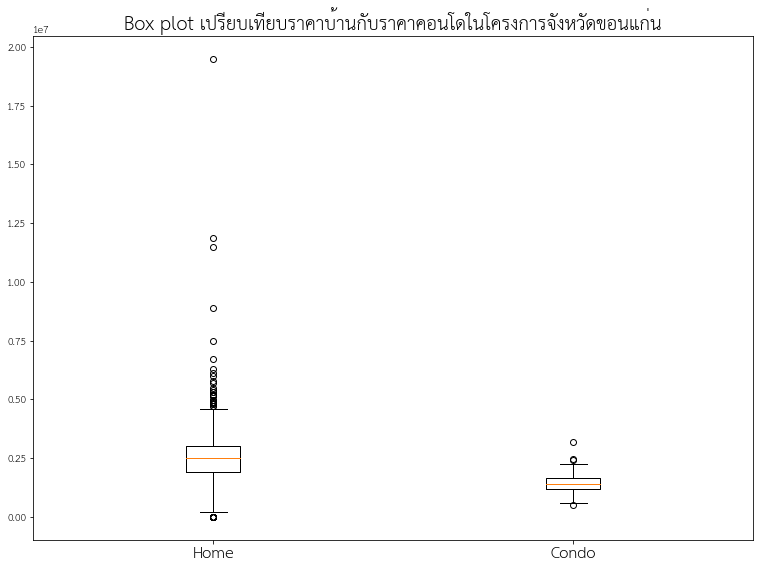

In [ ]:
# สร้าง boxplot
import matplotlib.pyplot as plt

kk_home_ = project_kk_home[project_kk_home['price_min'].notna()]
kk_condo_ = kk_codo[kk_codo['price_min'].notna()]
Lst_kk_home_ = kk_home_['price_min'].tolist()
Lst_kk_condo_ = kk_condo_['price_min'].tolist()
arr_kk_home  = np.array(Lst_kk_home_)
arr_kk_condo = np.array(Lst_kk_condo_)
data = [arr_kk_home,arr_kk_condo]
my_labels = ['Home', 'Condo']
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 # Creating plot
bp = ax.boxplot(data, labels=my_labels, )
ax.set_xticklabels(labels=my_labels, Fontsize=15)

# show plot
ax.set_title('Box plot เปรียบเทียบราคาบ้านกับราคาคอนโดในโครงการจังหวัดขอนแก่น', Fontsize=18)
plt.show()



---



---



### **8. บ้านในภาคเหนือ ใต้ อีสาน ที่ไหนแพงสุด ถูกสุด (เลือกจังหวัดที่เป็นตัวแทน ภาคละ 2 จังหวัด)**

In [ ]:
# โครงการบ้านในภาคเหนือ
North = project_df2[(project_df2['province_name_th'] == 'เชียงใหม่') | (project_df2['province_name_th'] == 'เชียงราย')]
NortHome = North[North['propertytype_name_th']=='บ้าน']
print(NortHome.shape)
desc_NortHome = NortHome.describe()
avg_priceNortHome = desc_NortHome['price_min']['mean']
print('*'*80)
print(f'ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคเหนือ **{avg_priceNortHome:,}** บาท')

(1067, 45)
********************************************************************************
ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคเหนือ **3,225,139.4566854993** บาท


In [ ]:
# โครงการบ้านในภาคใต้
South = project_df2[(project_df2['province_name_th'] == 'นครศรีธรรมราช') | (project_df2['province_name_th'] == 'สงขลา')]
SouthHome = South[South['propertytype_name_th']=='บ้าน']
print(SouthHome.shape)
desc_SouthHome = SouthHome.describe()
avg_priceSouthHome= desc_SouthHome['price_min']['mean']
print('*'*80)
print(f'ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคใต้ **{avg_priceSouthHome:,}** บาท')

(266, 45)
********************************************************************************
ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคใต้ **3,434,315.785714286** บาท


In [ ]:
# โครงการบ้านในภาคอีสาน
Northeast = project_df2[(project_df2['province_name_th'] == 'นครราชสีมา') | (project_df2['province_name_th'] == 'อุบลราชธานี')]
NortheastHome = Northeast[Northeast['propertytype_name_th']=='บ้าน']
print(NortheastHome.shape)
desc_NortheastHome = NortheastHome.describe()
avg_priceNortheastHome = desc_NortheastHome['price_min']['mean']
print('*'*80)
print(f'ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคอีสาน **{avg_priceNortheastHome:,}** บาท')

(583, 45)
********************************************************************************
ราคาบ้านเฉลี่ยในโครงการพื้นที่ภาคอีสาน **2,815,397.7280550776** บาท


In [ ]:
# Create dictionary
dict_price = {'North': avg_priceNortHome, 'South':avg_priceSouthHome, 'Northeast': avg_priceNortheastHome}
#dict_price
# dictionary sorted by value
sorted_price = OrderedDict(sorted(dict_price.items(), key=lambda t: t[1]))
price_item = list(sorted_price.items())
print(price_item)
print('*'*80)
print('ราคาบ้านในภาคเหนือ ใต้ และ อีสานเรียงลำดับจาก *ถูกที่สุด* ไป *แพงที่สุด*')
for i in range(len(price_item)):
    ph = price_item[i]
    print('-'*50)
    print(f'ภาค {ph[0]} ราคา {ph[1]:,} บาท')

[('Northeast', 2815397.7280550776), ('North', 3225139.4566854993), ('South', 3434315.785714286)]
********************************************************************************
ราคาบ้านในภาคเหนือ ใต้ และ อีสานเรียงลำดับจาก *ถูกที่สุด* ไป *แพงที่สุด*
--------------------------------------------------
ภาค Northeast ราคา 2,815,397.7280550776 บาท
--------------------------------------------------
ภาค North ราคา 3,225,139.4566854993 บาท
--------------------------------------------------
ภาค South ราคา 3,434,315.785714286 บาท




---



---



9. ความหลากหลายของโครงการในขอนแก่น เทียบกับ ชลบุรี

In [ ]:
# โครงการในขอนแก่น
project_kk = project_df2[project_df2['province_name_th'] == 'ขอนแก่น']
print(project_kk.shape)
print('*'*80)
# แสดงประเภทของโครงการที่มีทั้งหมดในจังหวัดขอนแก่น
type_name_kk = project_kk['propertytype_name_th']
print(f'จำนวนประเภทของโครงการที่มีทั้งหมดในขอนแก่น **{len(list(set(type_name_kk)))}** ประเภท')
print(f'ประเภทโครงการในขอนแก่นประกอบด้วย {list(set(type_name_kk))}')
print('-'*80)
print('\n')
# โครงการในชลบุรี
project_Chon = project_df2[project_df2['province_name_th'] == 'ชลบุรี']
print(project_Chon.shape)
print('*'*80)
# แสดงประเภทของโครงการที่มีทั้งหมดในจังหวัดชลบุรี
type_name_Chon = project_Chon['propertytype_name_th']
print(f'จำนวนประเภทของโครงการที่มีทั้งหมดในชลบุรี **{len(list(set(type_name_Chon)))}** ประเภท')
print(f'ประเภทโครงการในชลบุรีประกอบด้วย {list(set(type_name_Chon))}')
print('-'*80)

(617, 45)
********************************************************************************
จำนวนประเภทของโครงการที่มีทั้งหมดในขอนแก่น **6** ประเภท
ประเภทโครงการในขอนแก่นประกอบด้วย ['คอนโด', 'บ้านแฝด', 'ทาวน์โฮม', 'บ้าน', 'โฮมออฟฟิศ', 'อาคารพาณิชย์']
--------------------------------------------------------------------------------


(2863, 45)
********************************************************************************
จำนวนประเภทของโครงการที่มีทั้งหมดในชลบุรี **8** ประเภท
ประเภทโครงการในชลบุรีประกอบด้วย ['โรงแรม', 'คอนโด', 'บ้านแฝด', 'ทาวน์โฮม', 'อพาตเมนต์', 'บ้าน', 'โฮมออฟฟิศ', 'อาคารพาณิชย์']
--------------------------------------------------------------------------------


In [ ]:
set_ytpe = set(type_name_Chon) - set(type_name_kk)
print(f'----- ประเภทของโครงการที่ขอนแก่นไม่มีเหมือนชลบุรี คือ *{set_ytpe}* -----')

----- ประเภทของโครงการที่ขอนแก่นไม่มีเหมือนชลบุรี คือ *{'โรงแรม', 'อพาตเมนต์'}* -----
